# <center> Water quality prediction

Our project aim is to create a model which predicts in a best possible way quality of a water basing on contamination of different ingredient in it. We used dataset from [Kaggle website](https://www.kaggle.com/datasets/mssmartypants/water-quality/data).

**All attributes are numeric variables and they are listed bellow:**

aluminium - dangerous if greater than 2.8

ammonia - dangerous if greater than 32.5

arsenic - dangerous if greater than 0.01

barium - dangerous if greater than 2

cadmium - dangerous if greater than 0.005

chloramine - dangerous if greater than 4

chromium - dangerous if greater than 0.1

copper - dangerous if greater than 1.3

flouride - dangerous if greater than 1.5

bacteria - dangerous if greater than 0

viruses - dangerous if greater than 0

lead - dangerous if greater than 0.015

nitrates - dangerous if greater than 10

nitrites - dangerous if greater than 1

mercury - dangerous if greater than 0.002

perchlorate - dangerous if greater than 56

radium - dangerous if greater than 5

selenium - dangerous if greater than 0.5

silver - dangerous if greater than 0.1

uranium - dangerous if greater than 0.3

is_safe - class attribute {0 - not safe, 1 - safe}

# 1. Imports

In [53]:
import numpy as np
import pandas as pd
from yellowbrick.features import *
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# 2. Data visualization

In [54]:
df =  pd.read_csv('waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [55]:
df.shape

(7999, 21)

In [56]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# 3. Data preparetion & preprocesssing

In [58]:
df['ammonia'].value_counts()['#NUM!']
df = df[df['ammonia'].str.contains('#NUM!') == False]

In [59]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i])


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

c:\Users\adria\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


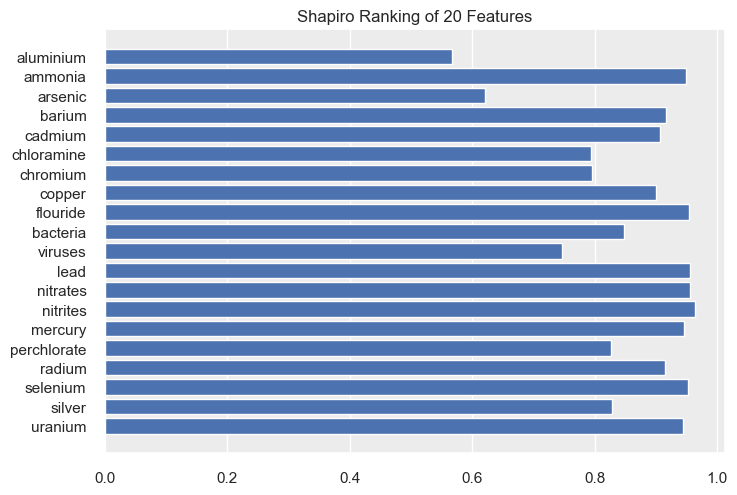

In [61]:
try:
    rank1d(df.iloc[:,:-1])
except AttributeError:
    pass

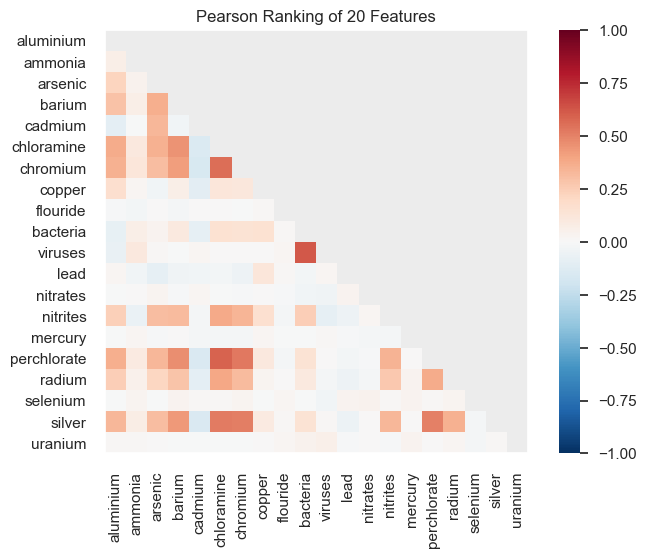

In [62]:
try:
    rank2d(df.iloc[:,:-1], algorithm="Pearson")
except AttributeError:
    pass

In [63]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


We can observe that maximum value for ammonia and selenium are always lower than threshhold for dangerous value, so we can delete these rows

In [64]:
df = df.drop(['ammonia','selenium'], axis=1)

Now we can normalize our data to get values from 0 to 1 to make it more suitable:

In [65]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.head()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,silver,uranium,is_safe
0,0.326733,0.038095,0.576923,0.053846,0.040323,0.922222,0.085,0.033333,0.20,0.000,0.270,0.810893,0.385666,0.7,0.629062,0.848561,0.68,0.222222,1.0
1,0.459406,0.009524,0.670040,0.015385,0.608295,0.755556,0.330,0.600000,0.65,0.650,0.500,0.101362,0.658703,0.3,0.537577,0.401752,0.54,0.555556,1.0
2,0.200000,0.038095,0.117409,0.061538,0.488479,0.588889,0.010,0.660000,0.05,0.003,0.390,0.714070,0.378840,0.6,0.837860,0.884856,0.88,0.111111,0.0
3,0.269307,0.038095,0.599190,0.007692,0.832949,0.033333,0.830,0.720000,0.71,0.710,0.080,0.071104,0.440273,0.4,0.151975,0.215269,0.90,0.555556,1.0
4,0.182178,0.028571,0.040486,0.046154,0.307604,0.766667,0.285,0.406667,0.13,0.001,0.585,0.339889,0.378840,0.3,0.281620,0.301627,0.12,0.222222,1.0


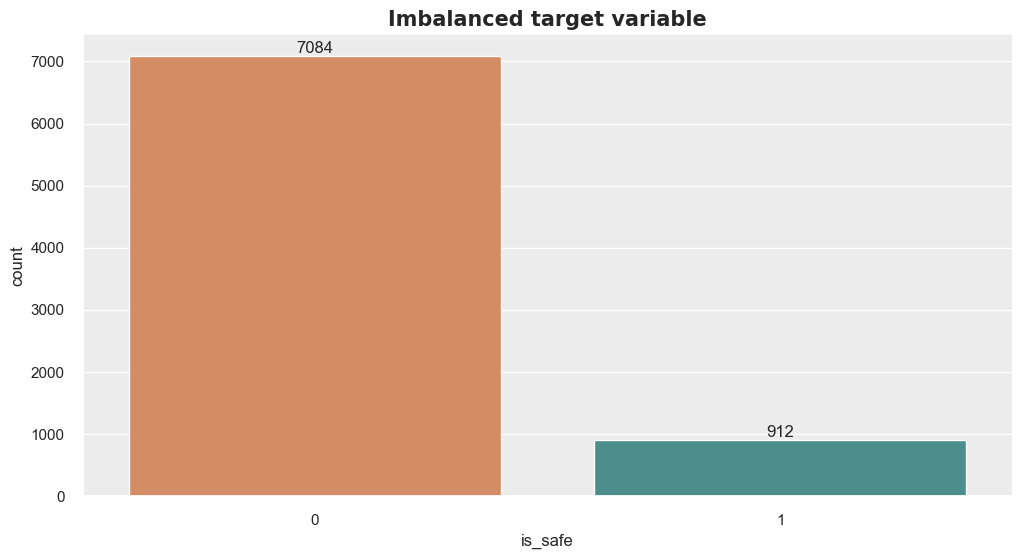

In [66]:
#plot target variable
palette_features = ['#E68753', '#409996']

sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=df['is_safe'], data=df, palette=palette_features)

#add labels to each bar
abs_values = df['is_safe'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

In [67]:
X = normalized_df.drop('is_safe', axis=1)
y = normalized_df['is_safe']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)
smt = SMOTETomek(random_state=111)

X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())


1.0    5621
0.0    5621
Name: is_safe, dtype: int64


# 4. Testing different models

In [68]:
dt_clf = DecisionTreeClassifier(random_state=111)
dt_clf.fit(X_resampled, y_resampled)
y_pred_dt = dt_clf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_dt)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Accuracy on test set:", accuracy1)


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1429
         1.0       0.65      0.81      0.72       171

    accuracy                           0.93      1600
   macro avg       0.81      0.88      0.84      1600
weighted avg       0.94      0.93      0.94      1600

Decision Tree Accuracy on test set: 0.93375


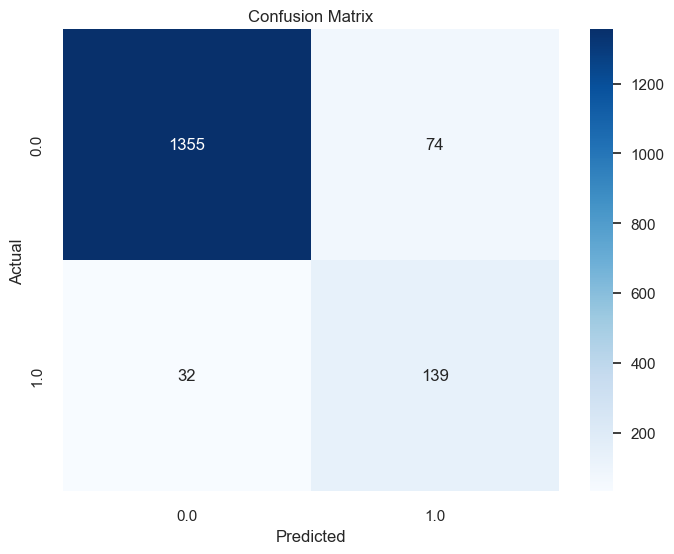

In [69]:
cm = confusion_matrix(y_test, y_pred_dt)
class_labels = np.unique(np.concatenate((y_test, y_pred_dt)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
random_forest = RandomForestClassifier(n_estimators=50, random_state=111)
random_forest.fit(X_resampled, y_resampled)

y_pred = random_forest.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy on test:", accuracy2)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1429
         1.0       0.74      0.84      0.78       171

    accuracy                           0.95      1600
   macro avg       0.86      0.90      0.88      1600
weighted avg       0.95      0.95      0.95      1600

Accuracy on test: 0.950625


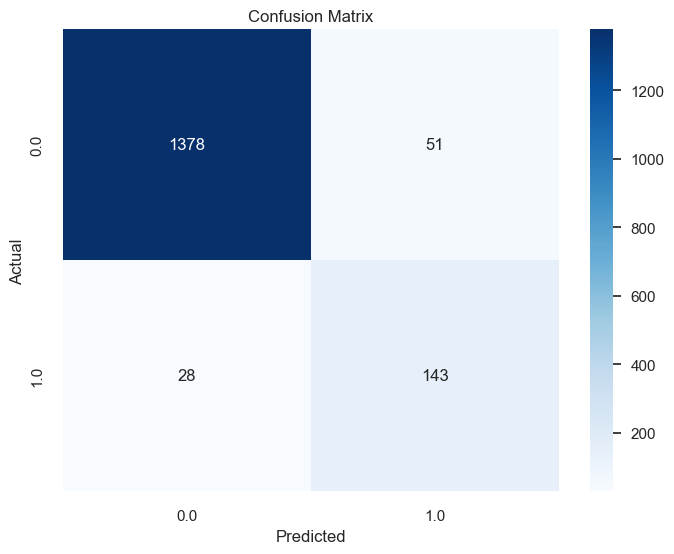

In [71]:
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=111)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 2 folds for each of 96 candidates, totalling 192 fits
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9684219889699341


In [73]:
y_pred = grid_search.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on test set- grid search:", accuracy3)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1429
         1.0       0.70      0.89      0.79       171

    accuracy                           0.95      1600
   macro avg       0.84      0.92      0.88      1600
weighted avg       0.96      0.95      0.95      1600

Accuracy on test set- grid search: 0.948125


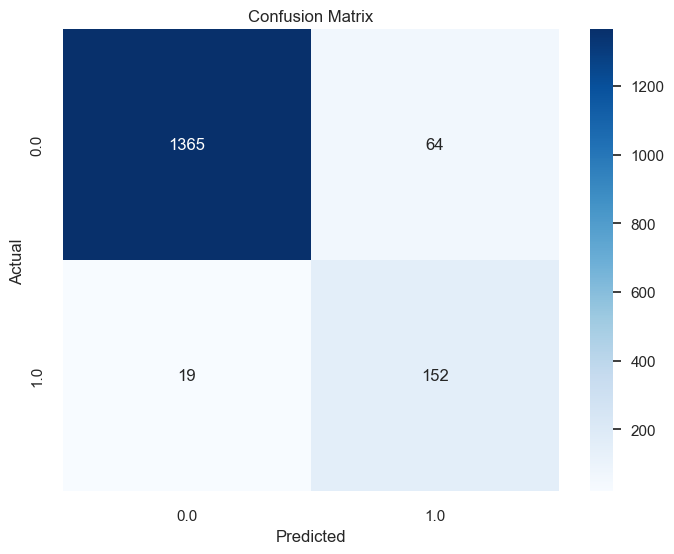

In [74]:
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [75]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)

print(f'Accuracy - logistic regression: {accuracy4:.2f}')

print(classification_report(y_test, y_pred))
conf_matrix1 = confusion_matrix(y_test, y_pred)

Accuracy - logistic regression: 0.91
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1429
         1.0       0.69      0.35      0.46       171

    accuracy                           0.91      1600
   macro avg       0.81      0.66      0.71      1600
weighted avg       0.90      0.91      0.90      1600



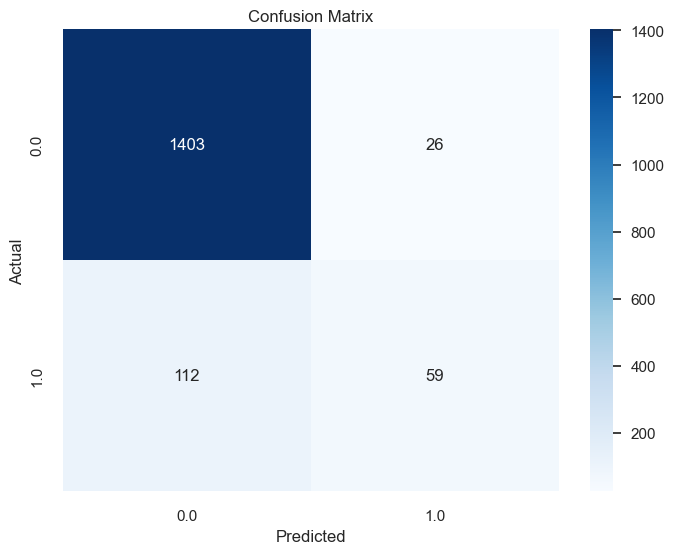

In [76]:
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
clf = svm.SVC(kernel='rbf', gamma=1.2, C=1.2) # hyperparametrization
clf.fit(X_train, y_train)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [78]:
accuracy5 = accuracy_score(y_test, y_pred)

print(f'Accuracy - SVM: {accuracy5:.2f}')

print(classification_report(y_test, y_pred))

Accuracy - SVM: 0.94
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1429
         1.0       0.82      0.56      0.66       171

    accuracy                           0.94      1600
   macro avg       0.88      0.77      0.81      1600
weighted avg       0.93      0.94      0.93      1600



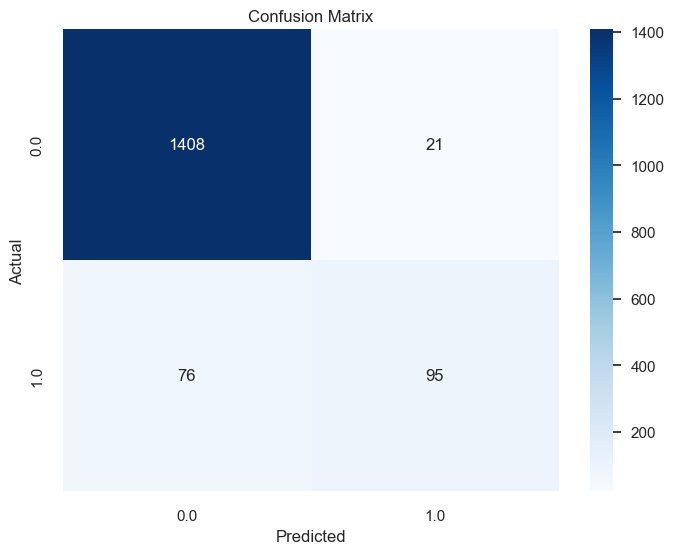

In [79]:
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Comparison of results

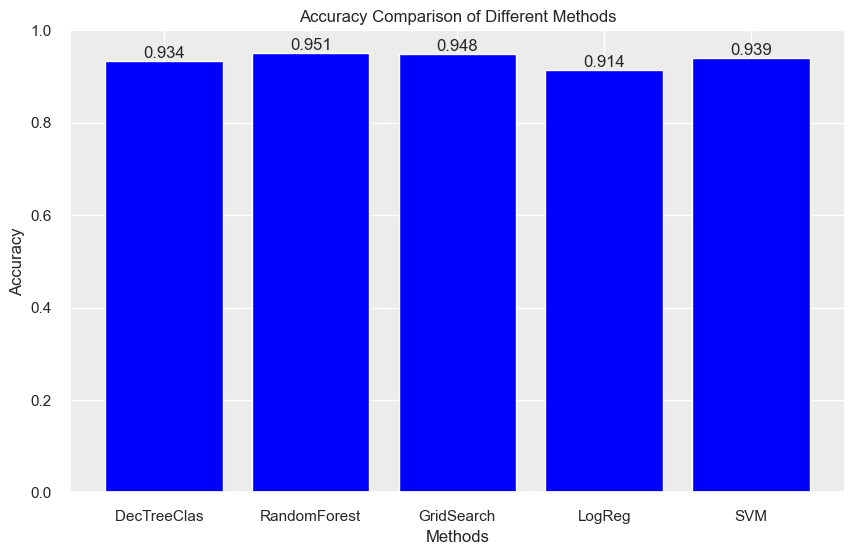

In [80]:
methods = ['DecTreeClas  ', 'RandomForest', 'GridSearch', 'LogReg', 'SVM']



accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]


plt.figure(figsize=(10, 6))

plt.bar(methods, accuracy_values, color='blue')
plt.ylim(0, 1) 
plt.title('Accuracy Comparison of Different Methods')

plt.xlabel('Methods')
plt.ylabel('Accuracy')
for i, value in enumerate(accuracy_values):
    plt.text(i, value, round(value,3), ha='center', va='bottom')
plt.show()